In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the dataset
data = pd.read_csv('/content/advertising.csv')
# Display the first few rows of the dataset
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [5]:
# Check for missing values
print(data.isnull().sum())
# Split the data into features (X) and target (y)
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

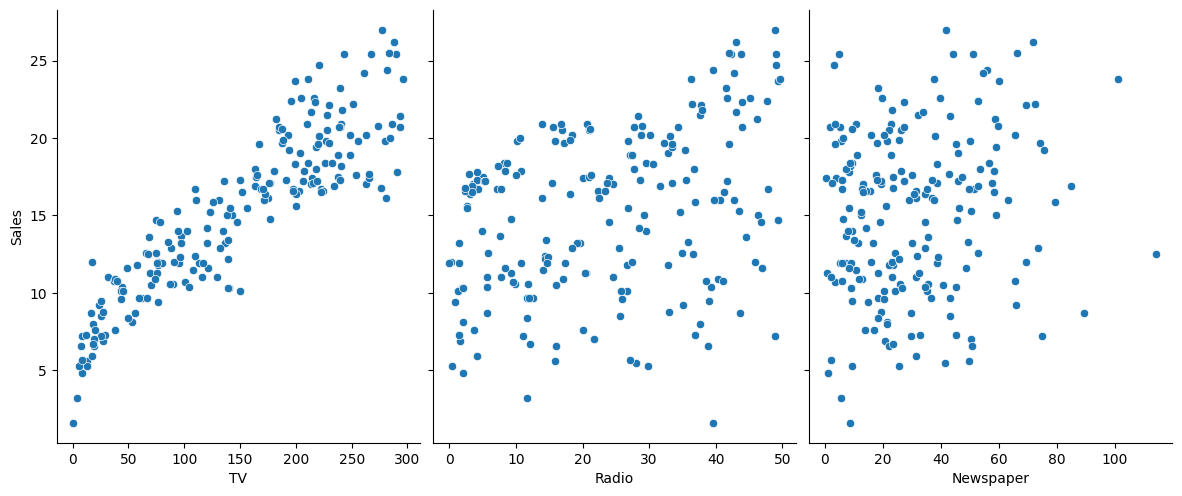

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# Pairplot to visualize the relationships
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.8)
plt.show()

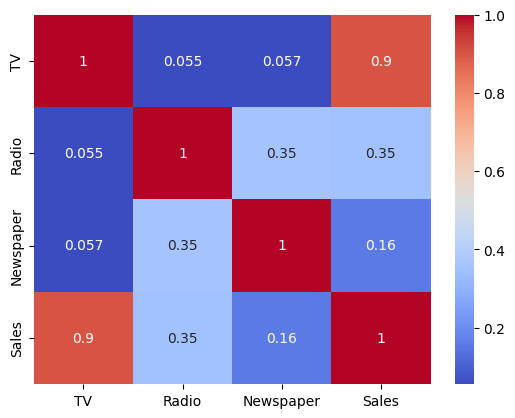

In [10]:
# Correlation heatmap
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
# Initialize the model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
# Make predictions
y_pred = model.predict(X_test)
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = model.score(X_test, y_test)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Accuracy: {accuracy}')

Mean Squared Error: 2.9077569102710927
R-squared: 0.9059011844150825
Accuracy: 0.9059011844150825


In [15]:

# Example new data
new_data = pd.DataFrame({
    'TV': [150],
    'Radio': [25],
    'Newspaper': [45]
})

# Standardize the new data using the previously fitted scaler
new_data_scaled = scaler.transform(new_data)

# Make predictions
new_sales_pred = model.predict(new_data_scaled)
print(f'Predicted Sales: {new_sales_pred[0]}')


Predicted Sales: 15.609300194612524
